# Backpropagation for multi-layer networks
This exercise implements the backpropagation example in chapter 3, *Sigmoid Neurons and Backpropagation*. The figure shows a simple two-layer feed-forward neural network used to explain backpropagation. 

![](doc/neurons.png)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Starting weights: 
w_xg = [ 0.3  0.6 -0.1], w_gf = [-0.2  0.5]

After epoch 499
y_true = 1.00, y_pred = 0.96 (MSE = 6.56e-04)
MSE' = -3.62e-02
Neuron G output y_g = 0.82
Neuron F output y_f = 0.96
Error term F = -0.001
Error term G = -0.0002
Delta w_xg = [ 1.06109464e-04 -9.54985173e-05  1.06109464e-05]
Delta w_gf = [0.00063238 0.00051546]
updated w_xg = [ 1.06498743 -0.08848868 -0.02350126]
updated w_gf = [2.0367316  1.52789664]
End of loop



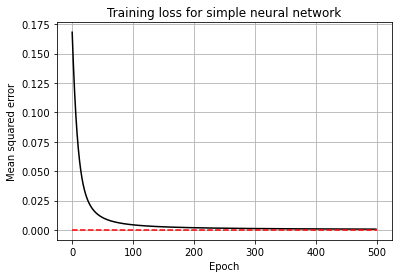

In [4]:
# Print every epoch?
print_every_epoch=False

# Weights for layer G
w_xg0 = 0.3
w_xg1 = 0.6
w_xg2 = -0.1
w_xg = np.array([w_xg0, w_xg1, w_xg2])

# Weights for layer F
w_gf0 = -0.2
w_gf1 = 0.5
w_gf = np.array([w_gf0, w_gf1])

# Inputs
x1 = -0.9
x2 = 0.1
x_xg = np.array([1.0, x1, x2]) # First element is 1 for bias. 

# True y
y_true = 1.0

# Learning rate
learning_rate = 0.5 # Experiment with the learning rate

# Epochs
num_epochs = 500

# Allocate space for the mean squared error
mse = np.zeros(num_epochs)

# Print update
print("Starting weights: ")
print("w_xg = " + str(w_xg) + ", w_gf = " + str(w_gf))
print()
for k in range(num_epochs):
    
    ### Forward pass ###
    
    # Output of neuron G
    z_g = np.dot(x_xg, w_xg)
    y_g = np.tanh(z_g) # Save this for backprop
    
    # Output of neuron F
    x_gf = np.array([1.0, y_g])
    z_f = np.dot(x_gf, w_gf)
    y_f = sigmoid(z_f) # Save this for backprop
    
    # Calculate error (don't actually need to do this step)
    MSE = 0.5 * np.power(y_f - y_true, 2)
    mse[k] = MSE
    

    ### Backward pass ###
    
    ## Backpropagate the errors to get the gradients
    
    #  Derivative of the error function.
    dE_df = y_f - y_true # d(network error)) / d(output of neuron F)
    
    # Error for neuron F
    df_dzf = y_f * (1.0 - y_f) # Derivative of the output -- S'(z_f) = d/d(z_f){S(z_f)} = S(z_f) * (1 - S(z_f))
    err_F = dE_df * df_dzf
    
    # Error for neuron G
    dzf_dg = w_gf1
    dg_dzg = 1 - np.power(y_g, 2) # Derivative of the output of G: y_g = tanh(z_g); dy_g/dz_g = 1 - tanh^2(z_g) = 1 - y_g^2
    err_G = err_F * dzf_dg * dg_dzg
    
    ## Update the weights using the gradients
    
    # Calculate weight adjustments
    delta_w_xg = -1 * learning_rate * x_xg * err_G 
    delta_w_gf = -1 * learning_rate * x_gf * err_F 

    # Update the weights
    w_xg += delta_w_xg
    w_gf += delta_w_gf
    
    # Print update
    if print_every_epoch is True or k == num_epochs-1:
        print("After epoch %d" % k)
        print("y_true = %0.2f, y_pred = %0.2f (MSE = %0.2e)" % (y_true, y_f, MSE))
        print("MSE' = %0.2e" % dE_df)
        print("Neuron G output y_g = %0.2f" % y_g)
        print("Neuron F output y_f = %0.2f" % y_f)
        print("Error term F = %0.3f" % err_F)
        print("Error term G = %0.4f" % err_G)
        print("Delta w_xg = " + str(delta_w_xg))
        print("Delta w_gf = " + str(delta_w_gf))
        print("updated w_xg = " + str(w_xg))
        print("updated w_gf = " + str(w_gf))
        print("End of loop\n")

# Plot the results
plt.plot(mse, '-k')
plt.plot(np.array([0, num_epochs]), np.array([0,0]), '--r')
plt.xlabel("Epoch")
plt.ylabel("Mean squared error")
plt.title("Training loss for simple neural network")
plt.grid(which="major")
plt.show()